# **COMM475--Investment Policies: Portfolio Construction**

Instructor: Lorenzo Garlappi &copy; 2024<sup>*</sup>

TA: Tianping Wu

<sup>*</sup> <small>These notes are based on Rob Heinkel and Bill Tilford's lecture notes. I am grateful to them for generously sharing this material with me.</small>

# Portfolio Construction Techniques

This section introduces three portfolio construction techniques:
    
1. Mean-Variance Analysis (MVA)
    
2. Risk Parity Portfolio Construction (RP)
    
3. Multi-Risk Factor Model (MRF)
    
MVA should be a review of what you have already seen in earlier finance courses. Risk Parity Construction was created many years ago, but has seen a revival in recent years. We will view the RP model as a subset of the Multi-Risk Factor (MRF) model, which we will develop in more detail in the course, as we develop an Asset-Liability Model (ALM).

# **1. Mean-Variance Analysis (MVA)**



Consider a universe of $N$ assets, $i=1, 2, \ldots, N$. Each asset has an expected return $E[R_i]$ and volatility $\sigma[R_i]$. A **portfolio** is a set of weights $w =(w_1, w_2,\ldots,. w_N)$ combining these $N$ assets.   

**Efficient Frontier:**

1. **Mean return** of portfolio w: $$E[R(w)] = \sum_{i=1}^N w_iE[R_i]$$

where $R(w)$ denotes the random return on portfolio $w$.

2. **Return variance** of portfolio w: $$Var[R(w)] = \sum_{i=1}^N\sum_{j=1}^N w_iw_j cov[R_i,R_j]$$
where the **covariance** $cov[R_i,R_j]= \rho_{ij}\sigma[R_i]\sigma[R_j]$, with $\rho_{ij}$ denoting the **correlation** between return of asset $i$  and $j$. **Return volatility** is simply
 $$ \sigma[R(w)] = \sqrt{Var[R(w)]}$$

3. **Sharpe ratio** of portfolio $w$: $$S_w = \frac{E[R(w)]-R_f}{\sigma[R(w)]}$$
Where $R_f$ denotes the risk free rate.

4. A **mean-variance efficient portfolio** is a portfolio $w$ that has the minium variance (or volatility) among all portfolio with the same expected return $\mu^*$, that is, a mean-variance portfolio solves the following problem:

$$\min_{w} \sigma[R(w)],~~~s.t.~~ E[R(w)] = \mu^*,~~\text{and}~~\sum_{i=1}^N w_i = 1. $$

5. The **mean variance frontier** is the **set** of all mean-variance efficient portfolios. That is, as we vary $\mu^*$, we obtain a whole set of mean-variance efficient portfolios, one for each $\mu^*$. Because the problem is **quadratic** we know that for every $\mu^*$ there is a unique mean-variance efficient portfolio $w$, hence the frontier is well defined.  

## Matrix algebra

All the above is much simplified by using **matrix notation**.

a. Let $w$ denote a $(N\times 1)$ vector of portfolio weights: $w = (w_1, \ldots, w_N)^\top$, where $^\top$ means "transposed vector"

b. Let $\mu$ denote a $(N\times 1)$ vector of portfolio expcted returns:
$\mu = (\mu_1, \ldots, \mu_N)^\top$

c. Let $\sigma$ denote a $(N\times 1)$ vector of portfolio volatilities:
$\sigma = (\sigma_1, \ldots, \sigma_N)^\top$

d. Let $\rho$ denote the $N\times N$ **correlation matrix** and $\Sigma$ denotes the $N\times N$ **variance-covariance** matrix
$$ \Sigma \equiv \rho \odot  (\sigma \times \sigma^\top)$$
with $\odot$ denoting "element-wise multiplication"

Then the above quantities can be expressed as follows:

$$E[R(w)] = w^\top \mu$$

$$ \sigma[R(w)] = \sqrt{w^\top \Sigma\, w}$$

The mean variance frontier is the set of portfolios that solves

$$\min_{w} \sqrt{w^\top \Sigma w},~~~\text{s.t.}~~ w^\top \mu = \mu^*~~\text{and}~~w^\top\mathbf{1} =1 $$
where $\mathbf{1}$ is a $N\times 1$ vector of ones, that is $ \mathbf{1} = (1,1,\ldots,1)^\top$.






## Mean-Variance frontier with 3 risky assets and 1 riskless asset

The two tables below contain the **input** data for an MVA. The data requirement includes:

i. The asset classes to be employed: here we will use cash, C, bonds, B, stocks, S and private equity, E;

ii. Expected returns on the asset classes;

iii. The volatility (standard deviations) of the asset class returns

iv. The correlations of the returns between the asset classes.

The table shows that asset class expected returns increase with riskier asset classes. We'll show where these expected returns come from in the MRF model; here, we'll just take them as given.


|   | Expected <br> Return  | Volatility |
|---|---------|--------|
| **C** (Cash) | 0.020    | 0.000      |
| **B** (Bonds) | 0.054   | 0.075  |
| **S** (Stocks) | 0.066   | 0.133  |
| **E** (Private equity) | 0.098   | 0.164  |


<br>

Correlation matrix

|   | C     | B     | S     | E     |
|---|-------|-------|-------|-------|
| **C** | 1.00  | 0.00  | 0.00  | 0.00  |
| **B** |   | 1.00  | 0.08  | 0.06  |
| **S** |   |   | 1.00  | 0.14  |
| **E** |   |   |   | 1.00  |


We now write Python code to produce the mean-variance frontier. Once we have the code we can apply to **any** dataset. We first test it on the  data above and then scale up the analysis to real data. Using the above input data, the python code shown below can trace out the "efficient frontier": portfolio mixes that, for different expected portfolio returns, minimize the portfolio volatility (here defined as the standard deviation of portfolio return).

Let us first import packages that we need for our analysis

In [1]:
# import packages

import numpy as np   # needed to perform mathematical operations
import matplotlib.pyplot as plt # needed to plot graphs
from scipy.optimize import minimize # needed to solve optimization problems
import pandas as pd  # to handle dataframes



Here we manually input the expected returns, variances and correlations of Cash (C), Bonds (B), Stocks (S), and Private Equity (E)

In [4]:
# Input Data

# Expected returns
mu_C = 0.02   # Cash
mu_B = 0.054  # Bonds
mu_S = 0.066  # Stocks (public equity)
mu_E = 0.098  # Private equity

# Volatilities
sigma_C = 0.0
sigma_B = 0.075
sigma_S = 0.133
sigma_E = 0.164

# Correlations
rho_CC = 1.0
rho_CB = 0.0
rho_CS = 0.0
rho_CE = 0.0

rho_BC = rho_CB
rho_BB = 1.0
rho_BS = 0.08
rho_BE = 0.06

rho_SC = rho_CS
rho_SB = rho_BS
rho_SS = 1.0
rho_SE = 0.14

rho_EC = rho_CE
rho_EB = rho_BE
rho_ES = rho_SE
rho_EE = 1

Next, the input code is to collect data of risky assets in the vector/matrix form:

In [5]:
# Collect data of risky assets in vector/matrix form
mu_vec = np.array([mu_B, mu_S, mu_E])
sigmas = np.array([sigma_B, sigma_S, sigma_E])

# Typical asset used in the
asset_labels = ['B', 'S', 'E']

#correlation matrix -- Risky assets only
corr = np.array([
    [rho_BB, rho_BS, rho_BE],
    [rho_SB, rho_SS, rho_SE],
    [rho_EB, rho_ES, rho_EE]
])

#correlation matrix -- Risky and riskless assets
# corr = np.array([
#     [rho_CC, rho_CB, rho_CS, rho_CE],
#     [rho_BC, rho_BB, rho_BS, rho_BE],
#     [rho_SC, rho_SB, rho_SS, rho_SE],
#     [rho_EC, rho_EB, rho_ES, rho_EE]
# ])

cov_matrix = np.outer(sigmas, sigmas) * corr #covariance matrix
risk_free_rate = mu_C  # Risk-free rate is the expected return of cash

print(sigmas)
print(mu_vec)

print(asset_labels)

[0.075 0.133 0.164]
[0.054 0.066 0.098]
['B', 'S', 'E']


Here we construct two functions that take a generic portfolio $w$ and compute
1. the expected portfolio return (`portfolio_return`)
2. the portfolio volatility (`portfolio_volatility`)

In [6]:
# Functions for portfolio return, volatility, and Sharpe Ratio
def portfolio_return(w, mu):
    # return np.dot(w, mu)
    return w @ mu

def portfolio_volatility(w, cov_matrix):
    # return np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
    return np.sqrt( w @ cov_matrix @ w)


# Let us test that the functions work using the equal weight 1/N
w = np.ones(len(mu_vec)) * (1.0 / len(mu_vec))

print(portfolio_return(w, mu_vec))
print(portfolio_volatility(w, cov_matrix))

0.07266666666666666
0.08123310764569935


The next function construct the mean-variance frontier by solving the problem:
$$\min_w \sqrt{w^\top \Sigma w},~~s.t.~~w^
\top \mu = \mu^*,~~\text{and}~~w^\top\mathbf{1}=1.$$

By varying the target $\mu^*$ we can trace the whole frontier. 

We first define a function that does the optimization.

In [7]:
# This function computes the minimum volatility portfolio for a given target return
def find_min_volatility_given_target_mean(mu, cov_matrix, return_target, constr_sw, guess):
    
    N = len(mu) #number of assets
    #Here we define the cobnstraints for our optimization problem
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x, mu) - return_target}, #portfolio return= target
                    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})                               # sum of weights =1

    if constr_sw == 1:
        bounds = [(0, 1)] * N #No short-selling in all assets

        # You can customize the constraints here
        #  bounds = [(-0.1, 0.5), (-0.1, 0.5), (0, 0.5)]
    
    # Solve the optimization problem
    if constr_sw==1:
        result = minimize(portfolio_volatility, guess, args=(cov_matrix), method='SLSQP', bounds = bounds, constraints=constraints)
    else:
        result = minimize(portfolio_volatility, guess, args=(cov_matrix), method='SLSQP', constraints=constraints)

    
    return result


# Test the function
guess = np.ones(len(mu_vec)) * (1.0 / len(mu_vec))
constr_sw = 1
mu_target = 0.08
result = find_min_volatility_given_target_mean(mu_vec, cov_matrix, mu_target, constr_sw, guess)

result.x

array([0.25462962, 0.21238427, 0.53298611])

We then define a function that invokes the function `find_min_volatility_given_target_mean()` for many values of $\mu^*$ to construct the frontier

In [8]:
# Function that generates the Efficient Frontier
num_points = 100 # number of points (mu_targets) used to draw the frontier

def construct_mv_frontier(mu_vec, cov_matrix, constr_sw=0):
    mu_LB = min(mu_vec)/1.01 # Lower bound of expected return target
    mu_UB = max(mu_vec)*1.01 # Upper biond of expected return target

    frontier_returns = np.linspace(mu_LB, mu_UB, num_points)  #construct a grid of expexted returns
    frontier_risks = np.full(num_points, np.nan) #Initialize the frontier to NaN (= Not a Number)
    sharpe_ratios = np.full(num_points, np.nan) #sharpe ratio, which helps to find the tangent portfolio
    tangent_portfolio_weights = None #Initial value of the tangent portfolio weights
    all_weights = []  # Collect portfolio weights for each iteration


    N = len(mu_vec)
    init_guess = np.ones(N) * (1.0 / N) # this is the initial guess used by the optimization algorithm

    # Define constraints and bounds (no short selling for the first asset)
    for i in range(num_points):
        return_target = frontier_returns[i]

        #Here we invoke the function that determine the minimum volatility portfolio given a target return [defined above]
        result = find_min_volatility_given_target_mean(mu_vec, cov_matrix, return_target, constr_sw, init_guess)

    # Collect portfolio weights, expected return, and volatility
        weights_dict = {'Weights': result.x, 'Expected Return': return_target, 'Volatility': result.fun}
        all_weights.append(weights_dict)

     # updated Initial guess to the most recent solution
        init_guess = result.x

        if result.success:
            frontier_risks[i] = result.fun
            sharpe_ratios[i] = (return_target - risk_free_rate) / frontier_risks[i]

     # Update the tangent portfolio weights if this is the max Sharpe ratio so far
            if sharpe_ratios[i] == np.nanmax(sharpe_ratios):
                tangent_portfolio_weights = result.x

    max_sharpe_idx = np.nanargmax(sharpe_ratios)  #Find the index of the max Sharpe ratio portfolio
    tangent_return = frontier_returns[max_sharpe_idx] #Find the expected rerturn of the max Sharpe ratio portfolio
    tangent_risk = frontier_risks[max_sharpe_idx] #Find the volatility of the max Sharpe ratio portfolio

    # Convert the list of dictionaries to a DataFrame
    df_weights = pd.DataFrame(all_weights)

    return frontier_risks, frontier_returns, tangent_return, tangent_risk, tangent_portfolio_weights, df_weights

### Unconstrained frontier

Expected return of tangent portfolio (unconstrained):  0.0677174097409741
Volatility of tangent portfolio (unconstrained): 0.06955087945054839
Tangent Sharpe Ratio (unconstrained):  0.6860791713626254
Weights of the tangent portfolio (unconstrained):  [0.5500628  0.18999459 0.25994261]



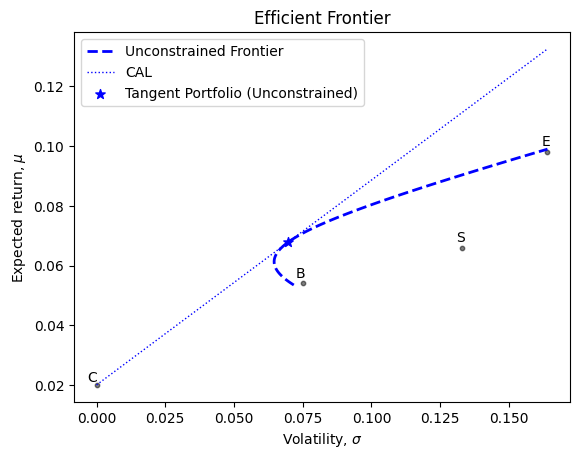

In [9]:
#Unconstrained frontier
# Generate mean-variance and find Tangent Portfolio


#This command allows to "freeze" the current plot so that any new plot will be superimposed
%matplotlib inline

frontier_risks_unconstr, frontier_returns_unconstr,\
 tangent_return_unconstr, tangent_risk_unconstr, tangent_weights_unconstr, df_weights_unconstr =\
      construct_mv_frontier(mu_vec, cov_matrix, constr_sw=0)


sharpe_ratio_unconstr = (tangent_return_unconstr - risk_free_rate)/tangent_risk_unconstr

# Define the sigma range range for the capital allocation line
sigma_range = np.linspace(0, np.nanmax(frontier_risks_unconstr))
cal_constr = risk_free_rate + sharpe_ratio_unconstr * sigma_range

# Plot the frontier
fig, ax = plt.subplots()
ax.plot(frontier_risks_unconstr, frontier_returns_unconstr, 'b--', linewidth=2, label='Unconstrained Frontier')

# Mark the position of the assets
ax.scatter(sigmas, mu_vec, color='black', alpha=0.5, s=40, marker='.')  # Asset points
ax.scatter(0, risk_free_rate, color='black', alpha=0.5, s=40, marker='.') # risk-free rate

# Add labels for each asset
for i, txt in enumerate(asset_labels):
    ax.text(sigmas[i] + 0.001, mu_vec[i] + 0.001, txt, ha='right', va='bottom')  # Adjust label positioning if necessary

ax.text(0, risk_free_rate, 'C', ha='right', va='bottom')


# Plotting the cal line
ax.plot(sigma_range, cal_constr, 'b:', linewidth=1, label='CAL')


# Mark the tangent portfolios
ax.scatter(tangent_risk_unconstr, tangent_return_unconstr, color='blue', marker='*', s=50, label='Tangent Portfolio (Unconstrained)')


# Add axis labels and title
ax.set_xlabel(r'Volatility, $\sigma$')
ax.set_ylabel(r'Expected return, $\mu$')
ax.set_title('Efficient Frontier')

# Show legend
ax.legend()


# The tangent portfolio information
print("Expected return of tangent portfolio (unconstrained): ", tangent_return_unconstr)
print("Volatility of tangent portfolio (unconstrained):", tangent_risk_unconstr)
print("Tangent Sharpe Ratio (unconstrained): ", sharpe_ratio_unconstr)
print("Weights of the tangent portfolio (unconstrained): ", tangent_weights_unconstr)
print("")

### Constrained frontier

Many pension plans are not allowed to borrow or taking short position. In what follows we construct the portfolio frontier under the constraint that no weight can be negative (short positions).

All we need to do now to generate the constrained frontier is to call the function `construct_mv_frontier` with the argument `constr_sw=1`. This tells the function to apply the constraint in the optimization

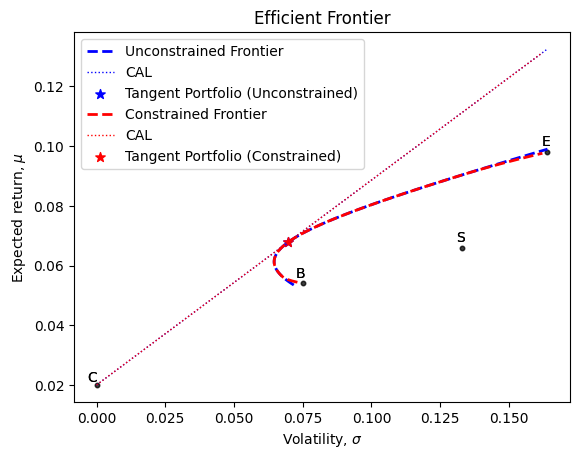

CONSTRAINED FRONTIER
Expected return of tangent portfolio (constrained):  0.0677174097409741
Volatility of tangent portfolio (constrained): 0.06955087945374214
Tangent Sharpe Ratio (constrained):  0.686079171331121
Weights of the tangent portfolio (constrained):  [0.5500628  0.18999459 0.25994261]

UNCONSTRAINED FRONTIER
Expected return of tangent portfolio (unconstrained):  0.0677174097409741
Volatility of tangent portfolio (unconstrained): 0.06955087945055434
Tangent Sharpe Ratio (unconstrained):  0.6860791713625667
Weights of the tangent portfolio (unconstrained):  [0.5500628  0.18999459 0.25994261]



In [63]:
#Constrained frontier
# Generate Efficient Frontier and find Tangent Portfolio

# This command allows to "freeze" the previous plot so that any new plot will be superimposed

%matplotlib inline
frontier_risks_constr, frontier_returns_constr, \
tangent_return_constr, tangent_risk_constr, tangent_weights_constr, df_weights_constr = construct_mv_frontier(mu_vec, cov_matrix, constr_sw=1)

sharpe_ratio_constr = (tangent_return_constr - risk_free_rate)/tangent_risk_constr

# Define the sigma range range for the capital allocation line
sigma_range = np.linspace(0, np.nanmax(frontier_risks_constr))
cal_constr = risk_free_rate + sharpe_ratio_constr * sigma_range

# Plot the frontier
ax.plot(frontier_risks_constr, frontier_returns_constr, 'r--', linewidth=2, label='Constrained Frontier')

# Mark the position of the assets
ax.scatter(sigmas, mu_vec, color='black', alpha=0.5, s=40, marker='.')  # Asset points
ax.scatter(0, risk_free_rate, color='black', alpha=0.5, s=40, marker='.') # risk-free rate

# Add labels for each asset
for i, txt in enumerate(asset_labels):
    ax.text(sigmas[i] + 0.001, mu_vec[i] + 0.001, txt, ha='right', va='bottom')  # Adjust label positioning if necessary

ax.text(0, risk_free_rate, 'C', ha='right', va='bottom')


# Plotting the cal line
ax.plot(sigma_range, cal_constr, 'r:', linewidth=1, label='CAL')


# Mark the tangent portfolios
ax.scatter(tangent_risk_constr, tangent_return_constr, color='red', marker='*', s=50, label='Tangent Portfolio (Constrained)')


# Add axis labels and title
# plt.xlabel(r'Volatility, $\sigma$')
# plt.ylabel(r'Expected return, $\mu$')
# plt.title('Efficient Frontier')

# Show legend
ax.legend()

# Show the plot
# plt.show()

display(fig)



# The tangent portfolio information
print("CONSTRAINED FRONTIER")
print("Expected return of tangent portfolio (constrained): ", tangent_return_constr)
print("Volatility of tangent portfolio (constrained):", tangent_risk_constr)
print("Tangent Sharpe Ratio (constrained): ", sharpe_ratio_constr)
print("Weights of the tangent portfolio (constrained): ", tangent_weights_constr)

print("")
print("UNCONSTRAINED FRONTIER")
print("Expected return of tangent portfolio (unconstrained): ", tangent_return_unconstr)
print("Volatility of tangent portfolio (unconstrained):", tangent_risk_unconstr)
print("Tangent Sharpe Ratio (unconstrained): ", sharpe_ratio_unconstr)
print("Weights of the tangent portfolio (unconstrained): ", tangent_weights_unconstr)
print("")



Note that, except for very low or very high expected returns the constrained and unconstrained frontier are very close. You can experiment by making the constraints more severe and see what happens.

### Case Analysis

In this section we look at some portfolios on the unconstrained and constrained frontier and discuss some of their properties

Suppose we want to know the portfolio of risky assets that generates an expected return of 8%. 

<!-- We can easily find it by searching on the frontier.

The expected return and volatility values on the unconstrained frontier are collected in the variable  `frontier_return_unconstr` and `frontier_risks_unconstr`, respectively

Similarly, the expected return and volatility values on the constrained frontier are collected in the variable  `frontier_return_constr` and `frontier_risks_constr`, respectively -->

<!-- The code below finds the portfolio with the return as close as possible to 8% on the frontiers we constructed above. -->

The following code computes the exact portfolio that delivers 8% with a minimum volatility. We do so by invoking the function `find_min_volatility_given_target_mean` that we created above

In [70]:
target_return = 0.08

constr_sw = 0
guess = np.ones(len(mu_vec)) * (1.0 / len(mu_vec))

# Find the portfolio corresponding to the target return for the unconstrained frontier
result_unconstr = find_min_volatility_given_target_mean(mu_vec, cov_matrix, target_return, constr_sw, guess)
weight_riskyOnly_unconstr = result_unconstr.x

# Find the portfolio corresponding to the target return for the constrained frontier
constr_sw = 1
guess = np.ones(len(mu_vec)) * (1.0 / len(mu_vec))

result_constr = find_min_volatility_given_target_mean(mu_vec, cov_matrix, target_return, constr_sw, guess)
weight_riskyOnly_constr = result_constr.x

print("Risky-only, unconstrained portfolio that delivers 8% return", result_unconstr.x)
print("Risky-only, constrained portfolio that delivers 8% return  ", result_constr.x)

Risky-only, unconstrained portfolio that delivers 8% return [0.25462961 0.21238428 0.53298611]
Risky-only, constrained portfolio that delivers 8% return   [0.25462961 0.21238428 0.53298611]


Note that the two set of weights are basically the same. The short-selling constraint does not bind.




Here below we find the **global minimum variance portfolio**, that is, the portfolio with the lowest variance among all risky portfolios.

In [71]:
#write code to find the mimimum variance portfolio  (unconstrained)

def find_MVP(frontier_risk, frontier_returns):
    min_vol_index = np.nanargmin(frontier_risk)
    mu_MVP = frontier_returns[min_vol_index]
    sigma_MVP = frontier_risk[min_vol_index]
    return mu_MVP, sigma_MVP

mu_MVP_unconstr, sigma_MVP_unconstr = find_MVP(frontier_risks_unconstr,frontier_returns_unconstr)
mu_MVP_constr, sigma_MVP_constr = find_MVP(frontier_risks_constr,frontier_returns_constr)

print("Volatility and Expected return of MVP (unconstrained): ", mu_MVP_unconstr, sigma_MVP_unconstr)
print("Volatility and Expected return of MVP (constrained): ", mu_MVP_constr, sigma_MVP_constr)

Volatility and Expected return of MVP (unconstrained):  0.06128099409940994 0.06459933460037634
Volatility and Expected return of MVP (constrained):  0.06128099409940994 0.06459933459772833


#### Allowing cash in the portfolio (CAL)

If we are allowed to short cash, C, which means we can borrow money to invest in other assets, we can find any portfolios that lie along the "tangent line": a line connecting cash, C, to the "tangent portfolio," T, in the MVA graph.

Given a target return we can find the portfolio on the CAL associated with it by solving
$$\mu^{target} = (1-x) r_f + x \mu^{tangent} \implies x = \frac{\mu^{target} - r_f}{\mu^{tangent} - r_f} $$

where $x$ represent the fraction of wealth invested in the tangency portfolio, $T$. Because $T$ consists of $N$ risky assets,
$$ w^T = (w_1, w_2, \ldots, w_N),$$
we have that investing a fraction $x$ of wealth in the tangency portfolio corresponds to investing $xw_1$ in the risky asset 1, $xw_2$ in the risky asset 2, $\ldots$, and $xw_N$  in the risky asset $N$.

The following code determine the investment in each asset that achieves a particulat target expected return.


In [72]:
def find_weights_cal(target_return):
    # This function finds the weights on the Capital Allocation Line (CAL) for a given target return
    x = (target_return - risk_free_rate)/(tangent_return_unconstr-risk_free_rate)
    w_risky = x * tangent_weights_constr
    w = np.append(1-x, w_risky)  #total portfolio, including the risk-free asset

    return w

target_rturn = 0.08
weights_with_rf = find_weights_cal(target_rturn)

print("Portfolio of cash + risky asset only that delivers 8%:" ,weights_with_rf)


print("portfolio volatility:", portfolio_volatility(weights_with_rf[1:], cov_matrix))


Portfolio of cash + risky asset only that delivers 8%: [-0.2574027   0.69165046  0.23889971  0.32685254]
portfolio volatility: 0.08745346383798368


Notice that the above portfolio contains leverage, that is a negative position in cash. This portfolio achieves the same expected return as a portfolio on the mean-variance frontier of risky assets (see analysis above) but with a much lower volatility. This happens because the portfolio contains a risk-free position.

For reference, here below we report the portfolio of risky assets only (B, S, E, zero position in cash, C) that achieves a similar expected return. This is the portfolio we already compouted and stored in the variable `weight_riskyOnly_constr`




In [73]:
print("Portfolio of cash + risky asset only that delivers 8%:       ", weights_with_rf)
print("Unconstrained portfolio of risky asset only that delivers 8%:", np.append(0,weight_riskyOnly_unconstr))
print("Constrained portfolio of risky asset only that delivers 8%:  ", np.append(0,weight_riskyOnly_constr))

Portfolio of cash + risky asset only that delivers 8%:        [-0.2574027   0.69165046  0.23889971  0.32685254]
Unconstrained portfolio of risky asset only that delivers 8%: [0.         0.25462961 0.21238428 0.53298611]
Constrained portfolio of risky asset only that delivers 8%:   [0.         0.25462961 0.21238428 0.53298611]


In general, the risky-only portfolios (constrained and unconstrained) load more on risky assets (S and E, the last two entries in the vectors above) than the total portfolio (cash+risky-assets) in order to achieve the same expected return. That is, we have less "macro" risk exposure (i.e., exposure to the public/private equity markets) with the total portfolio. Risk Parity portfolio (see below) is a way to deal with this issue.

## Construction of the Mean-Variance frontier with simulations (no optimization)

Here we provide another method to find the efficient frontier. This is an example of a **simulation-based method**. Specifically, we start with the same original assets but instead of solving a constrained mimimization problem as before, we adopt a **brute force** approach in which we randomly draw many porttfolio weights $w$. For each portfolio we compute the mean return $E[R(w)]$ and volatility $\sigma[R(w)]$ an report them on the mean-variance plane. The left-most edge of the scatter plot we obtain  **is** the mean-variance frontier.

Set random seed for reproducibility:

In [23]:
np.random.seed(42)

In the code below, we randomly draw many portfolio weights and record the associated expected return, volatilty, and Sharpe ratio in the dataframe `portfolio_results`. 

In [24]:
# Number of portfolios to simulate
num_portfolios = 10000

# Set up array to hold results
results = np.zeros((3, num_portfolios))

# Monte Carlo simulation
for i in range(num_portfolios):
    # Generate random weights for portfolio holdings
    weights = np.random.random(len(mu_vec))
    weights = weights / np.sum(weights)

    # Calculate return and volatility for random portfolio
    p_return = portfolio_return(weights, mu_vec)
    p_volatility = portfolio_volatility(weights, cov_matrix)

    # Store return and volatility in results array
    results[0,i] = p_return
    results[1,i] = p_volatility

    # Store sharpe ratio in results array
    results[2,i] = (p_return - risk_free_rate) / p_volatility

# Convert results array to DataFrame
portfolio_results = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe'])

# Find portfolio with maximum Sharpe Ratio
max_sharpe_port = portfolio_results.iloc[portfolio_results['Sharpe'].idxmax()]

Let's take a peek at the dataframe `portfolio_results`

In [25]:
portfolio_results.head()

,Return,Volatility,Sharpe
0,0.075201,0.092754,0.595133
1,0.063593,0.065303,0.667553
2,0.078154,0.106358,0.546769
3,0.079270,0.100754,0.588263
4,0.062600,0.064842,0.656973


We can now just generate a scatter plots of the expected returns and volatility of the simulated portfolios 

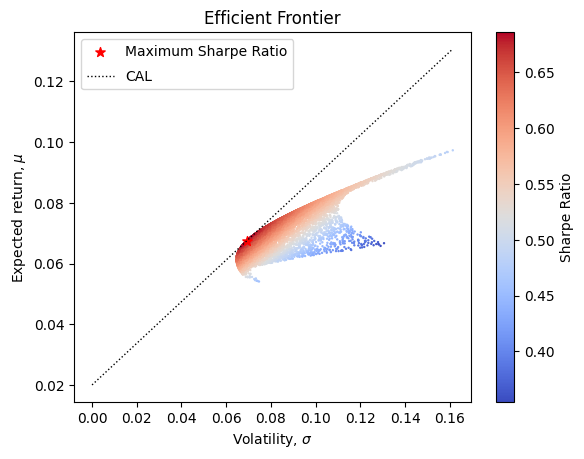

In [26]:
# Plot the simulation results

fig, ax = plt.subplots()

# Scatter plot with color mapped to Sharpe ratio
scatter = ax.scatter(portfolio_results['Volatility'], portfolio_results['Return'], c=portfolio_results['Sharpe'], cmap='coolwarm', s=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Sharpe Ratio')

# Mark the point with max sharpe ratio
ax.scatter(max_sharpe_port.iloc[1], max_sharpe_port.iloc[0], s=50, color='red', marker='*', label='Maximum Sharpe Ratio')

# Capital Allocation Line
# Define the sigma range range for the capital allocation line
sigma_range = np.linspace(0, np.nanmax(portfolio_results['Volatility']))
cal = risk_free_rate + max_sharpe_port['Sharpe'] * sigma_range

# Plot the capital allocation line
ax.plot(sigma_range, cal, 'k:', linewidth=1, label='CAL')

# Set labels and title
ax.set_xlabel(r'Volatility, $\sigma$')
ax.set_ylabel(r'Expected return, $\mu$')
ax.set_title('Efficient Frontier')

# Add legend with adjusted label spacing
ax.legend(labelspacing=0.8)

# Show the plot
plt.show()




## Mean Variance frontier with real data

Now we repeat the above analysis with real data. We download data of a subset of publicly-traded US stocks.

First, let us import some packages that we need for our analysis

In [14]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import yfinance as yf #to download data from Yahoo Finance



Here we can choose between
1. A small subset of a few stocks manually picked (set the variable small_set =1)
2. The entire set of 30 stocks that compose the DJIA index (set the variable small_set =0)

The next code block creates an array that contains the ticker symbols chosen



In [42]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

small_set = 1

if small_set == 1:
  symbols = ["AAPL", "MSFT", "GOOGL", "TSLA", "AMZN", "META", "NVDA"] # Choose a small set of stocks (the "Magnificent 7"!)
  # symbols = ["AAPL", "MSFT", "BTC-USD"] # Choose a small set of stocks (the "Magnificent 7"!)



else: # Download all the symbols for firms in the DJIA index

  url = ("https://www.ssga.com/us/en/institutional/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-dia.xlsx")

  symbols = (pd.read_excel(url, skiprows=4, nrows=30)
    .get("Ticker")
    .tolist()
    )

len(symbols)
print(symbols)

['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN', 'META', 'NVDA']


In the next block of code we download price information for the chosen stocks
you can select the start and end date

In [43]:
index_prices = (yf.download(tickers=symbols,
                            start="2000-01-01",
                            end="2024-01-01",
                            progress=True)
  .melt(ignore_index=False, var_name=["variable", "symbol"])
  .reset_index()
  .pivot(index=["Date", "symbol"], columns="variable", values="value")
  .reset_index()
  .rename(columns = {"Date": "date",
                     "Open": "open",
                     "High": "high",
                     "Low": "low",
                     "Close": "close",
                     "Adj Close": "adjusted",
                     "Volume": "volume"
                    })
)

# Let us take a peek at how the data we downloaded looks like by looking at the first few lines
index_prices.head()

[*********************100%%**********************]  7 of 7 completed


variable,date,symbol,adjusted,close,high,low,open,volume
0,2000-01-03,AAPL,0.847207,0.999442,1.004464,0.907924,0.936384,535796800.0
1,2000-01-03,AMZN,4.468750,4.468750,4.478125,3.952344,4.075000,322352000.0
2,2000-01-03,GOOGL,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-03,META,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-03,MSFT,36.132267,58.281250,59.312500,56.000000,58.687500,53228400.0


As you see from the table above, the data are arranged by date/firms. We would like to rearrange the data so that each column contains the time series of adjusted prices for each firm. This is like doing a pivot table in Excel. We will use the command ".pivot" in the line of code below. Take a look at how the data looks like after we rearrange them

In [44]:
adjusted_prices = index_prices.pivot(index='date', columns='symbol', values='adjusted')

adjusted_prices.tail()

symbol,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
date,,,,,,,
2023-12-22,193.600006,153.419998,141.490005,353.390015,374.579987,488.299988,252.539993
2023-12-26,193.050003,153.410004,141.520004,354.829987,374.660004,492.790009,256.609985
2023-12-27,193.149994,153.339996,140.369995,357.829987,374.070007,494.170013,261.440002
2023-12-28,193.580002,153.380005,140.229996,358.320007,375.279999,495.220001,253.179993
2023-12-29,192.529999,151.940002,139.690002,353.959991,376.040009,495.220001,248.479996


We now plot the data we downloaded

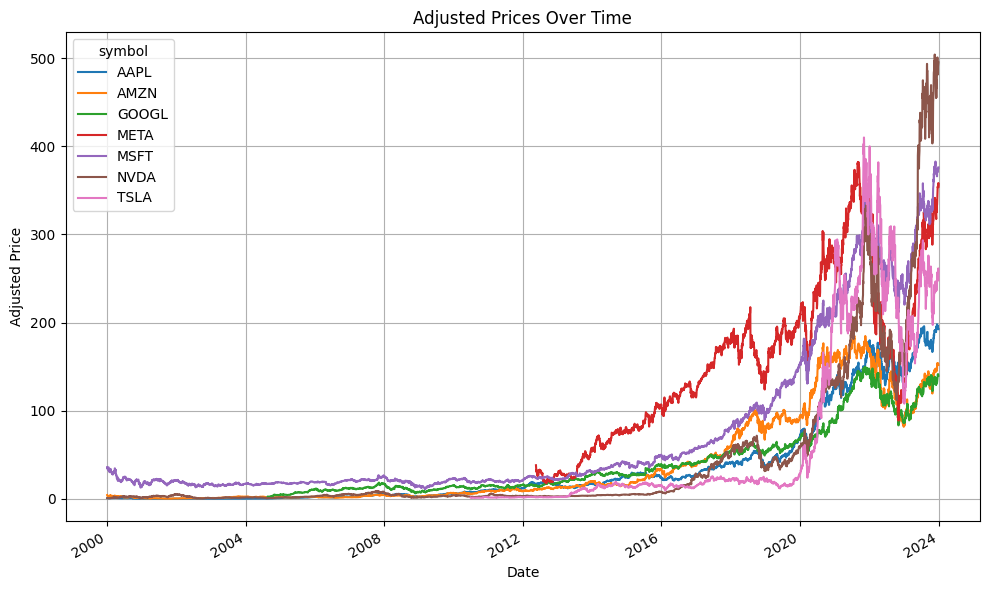

In [45]:
# Plotting adjusted prices
plt.figure(figsize=(10, 6))

adjusted_prices.plot(ax=plt.gca(), legend=True)  # Plot directly from DataFrame and remove legend


plt.title('Adjusted Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.grid(True)
plt.tight_layout()


# Display the plot
plt.show()

From the prices we now compute returns. We compute daily net returns defined as $r_t = p_t/p_{t-1} -1$, where $p_t$ is the adjusted price on day $t$.
The function pct_change() is helpful because it computes this percentage change.


In [52]:
# Step 1: Pivot the prices DataFrame to create a matrix of adjusted prices with dates as rows and symbols as columns
prices_matrix = index_prices.pivot(
    columns="symbol",
    values="adjusted",
    index="date"
)

# Step 2: Resample the pivoted matrix to monthly frequency and select the last value of each month
monthly_prices = prices_matrix.resample("M").last()

# Step 3: Calculate the percentage change of the monthly prices matrix
returns_matrix = monthly_prices.pct_change()

# Step 4: Drop rows with missing values (NaNs) resulting from percentage change calculation
# returns_matrix = returns_matrix.dropna()
print(returns_matrix.shape)


returns_matrix.head()

(288, 7)


symbol,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
date,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,0.104820,0.066796,NaN,NaN,-0.086846,0.726813,NaN
2000-03-31,0.184842,-0.027223,NaN,NaN,0.188811,0.320068,NaN
2000-04-30,-0.086517,-0.176306,NaN,NaN,-0.343530,0.054929,NaN
2000-05-31,-0.322922,-0.124575,NaN,NaN,-0.103046,0.280505,NaN


We now compute the mean monthly return and the covariance matrix

In [53]:
# Compute the mean, covariance matrix, and a vector of volatilities

mu_vec = np.array(returns_matrix.mean()).T
cov_matrix = np.array(returns_matrix.cov())
sigma_vec = np.sqrt(np.diag(cov_matrix))

# print(labels)
# print(mu_vec)
# # print(cov_matrix)
# print(sigma_vec)




In [54]:
# Let us test that the functions that we define above to compute portfolio returns and volatilty stil work using the equal weight 1/N
w = np.ones(len(mu_vec)) * (1.0 / len(mu_vec))

print(portfolio_return(w, mu_vec))
print(portfolio_volatility(w, cov_matrix))

0.026998943694292055
0.08080978430860973


We can now call our function that construct the mean variance frontier. We construct both an unconstrained and constrained frontier

In [55]:
frontier_sigma_unconstr, frontier_mu_unconstr, _, _, _, _ = construct_mv_frontier(mu_vec, cov_matrix, constr_sw = 0)
frontier_sigma_constr, frontier_mu_constr, _, _, _, _ = construct_mv_frontier(mu_vec, cov_matrix, constr_sw = 1)

Here we plot the frontier and the different stocks we used to construct it

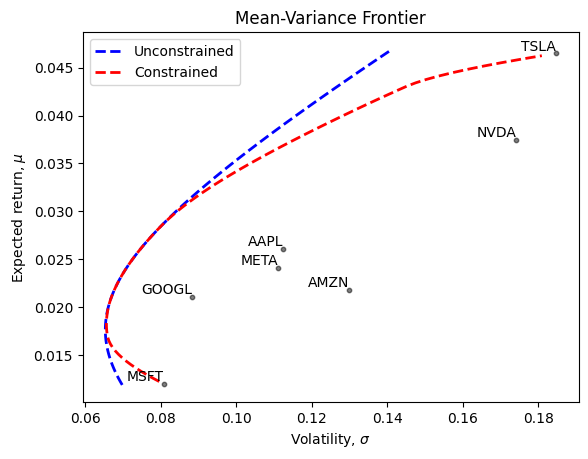

In [56]:
plt.plot(frontier_sigma_unconstr, frontier_mu_unconstr, 'b--', linewidth=2, label='Unconstrained')
plt.plot(frontier_sigma_constr, frontier_mu_constr, 'r--', linewidth=2, label='Constrained')


plt.scatter(sigma_vec, mu_vec, color='black', alpha=0.5, s=40,marker='.')  # Adjust 's' for smaller/larger points

# Add labels for each point
for i, txt in enumerate(labels):
    # print(i, txt)
    plt.text(sigma_vec[i], mu_vec[i], txt, ha='right', va='bottom')

plt.legend()

# Add axis labels and title if needed
plt.xlabel(r'Volatility, $\sigma$')
plt.ylabel(r'Expected return, $\mu$')
plt.title('Mean-Variance Frontier')

# Show the plot
plt.show()

# **2. Risk Parity (RP) Portfolio Construction**


The **Risk Parity (RP)** approach to portfolio construction seeks to diversify the **sources of risk**. The key idea is that different asset classes might be capturing different sources of "factor risks" such as **economic risk** or **inflation risk**.

"Economic risk" refers to changes in economic output, often measured as GDP. [This link contains US GDP data from the St.Louis Fed](https://fred.stlouisfed.org/series/GDP)
We often measure economic risk factor shocks by percentage changes in GDP over time.

As should seem sensible, equities like S and E, are more sensitive to economic shocks than bonds, B.

Inflation is another major risk factor. This is often measured as the percentage change in the CPI (consumer price index) over time. [Follow this link for updated CPI data in the US](https://fred.stlouisfed.org/series/FPCPITOTLZGUSA)

Since bonds pay fixed nominal payments they react much more negatively to inflation than equities do; in fact, equities may go up with inflation because earnings and dividends on stocks may go up with inflation.

In a typical portfolio on the MV frontier, different assets contribute to the total portfolio risk differently.
In a RP portfolio the goal is to control the amount of risk each asset contributes to the overall portfolio. By doing so we indirectly limit our exposure to broader factor such as GDP growth and Inflation.  

Recall the properties of the portfolios with 8% target expected return we computed in the MVA above

In [39]:
print("Portfolio of cash + risky asset only that delivers 8%:       ", weights_with_rf)
print("Unconstrained portfolio of risky asset only that delivers 8%:", np.append(0,weight_riskyOnly_unconstr))
print("Constrained portfolio of risky asset only that delivers 8%:  ", np.append(0,weight_riskyOnly_constr))


Portfolio of cash + risky asset only that delivers 8%:        [-0.2574027   0.69165046  0.23889971  0.32685254]
Unconstrained portfolio of risky asset only that delivers 8%: [0.         0.25308274 0.2104332  0.53648406]
Constrained portfolio of risky asset only that delivers 8%:   [0.         0.25308274 0.2104332  0.53648406]


The above portfolio contain **a lot** of macro risk, as the positions in S and E (the last two entries).

To control such exposures, we may want each asset to contribute **equally** to the total portfolio risk, hence the name "risk parity". Note that, mathematically, a RP portfolio in general **is not** on the mean-variance frontier, because its total risk is not minimum for a given level of expected return. The risk is distributed more "evenly" in the portfolio, but this does not guarantee that the portfolio has the minimum volatility, given the level of expected return.  

**Implementation.** Let us consider the MVA model with the three risky asset classes discussed above (B, S, and E). Each asset class had different expected returns.

To implement a RP portfolio we first alter each risky asset class so that the altered asset class has the desired expected return - in our example, that is 8%. These levered or delevered asset classes are what [BridgeWater](https://www.bridgewater.com/) calls "risk-adjusted asset classes" (they are really return- AND risk-adjusted).

Suppose we have an asset class $i$ with an expected return $\mu_i$ and volatility $\sigma_i$. Suppose we have a target expected return $\mu^*$ for our overall portfolio. Then by combining asset class $i$ with cash (expected return $\mu_C=r_f$ and $\sigma_C=0$), we can always find the portfolio weight in cash $X_i$ such that

$$ \mu^{*} = (1-X_i)\times \mu_C + X_i\times  \mu_i\implies X_i = \frac{\mu^*-r_f}{\mu_i-r_f}$$

Note that if $\mu^*>\mu_i$ then $X_i>1$ and therefore $(1-X_i)< 0$, implyng that to achieve a target $\mu^*$ we need to **borrow**, or **lever up** asset $i$.

Following this logic in our example above, we will use cash to lever up or down the assets B, S, E to obtain the  risk-return-adjusted (levered or unlevered) asset classes, B', S' and E'. Each of these new asset classes (a mix of C and that asset) has an expected return of $\mu^*$.


The following function computes the weight $X_i$ needed to achieve a given target return $\mu^*$.


In [40]:
def find_leverage(asset_expected_return, target_expected_return, risk_free_rate):
  # Find the weight X_i sugh that the adjusted asset has an expected return equal to the target
  X_i = (target_expected_return - risk_free_rate) / (asset_expected_return - risk_free_rate)

  return X_i


Suppose now we have a target expected return $\mu^*=8\%$.
Let us compute the adjustment weights $X_B$, $X_S$ and $X_E$.

In [41]:
target_expected_return = 0.08

X_B = find_leverage(mu_B, target_expected_return, risk_free_rate)
X_S = find_leverage(mu_S, target_expected_return, risk_free_rate)
X_E = find_leverage(mu_E, target_expected_return, risk_free_rate)

print(X_B)
print(X_S)
print(X_E)

1.764705882352941
1.3043478260869565
0.7692307692307692


The result above show that we need to lever up B and S (because their expected return is less than 8%) and lever down E (because its expected return is higher than 8%).

For example,  "risk-adjusted" B asset class,  B', has, for every 1 dollar invested by the client, \$0.76 borrowed from C and invested in B.
The risk-adjusted asset class $B^{\prime}$ has $E[r_{B'}] = 0.08$ and $\sigma[r_{B'}] = 1.76\times \sigma_{B}$.

Similarly,

$E[r_{S'}] = 0.08$ and $\sigma[r_{S'}] = 1.30\times \sigma_{S}$.

$E[r_{E'}] = 0.08$ and $\sigma[r_{E'}] = 0.76\times \sigma_{E}$.

All risk-adjusted asset classes have the same expected return but different volatiltiy.


In [42]:
def compute_sigma_prime(X, sigma):
  #This function computes the volatility of the levered up/down asset
  sigma_prime = X * sigma
  return sigma_prime


mu_B_prime = target_expected_return
mu_S_prime = target_expected_return
mu_E_prime = target_expected_return

sigma_B_prime = compute_sigma_prime(X_B, sigma_B)
sigma_S_prime = compute_sigma_prime(X_S, sigma_S)
sigma_E_prime = compute_sigma_prime(X_E, sigma_E)

print([sigma_B, sigma_B_prime])
print([sigma_S, sigma_S_prime])
print([sigma_E, sigma_E_prime])


[0.075, 0.13235294117647056]
[0.133, 0.17347826086956522]
[0.164, 0.12615384615384614]


The following graph illustrates the main idea in the RP construction  

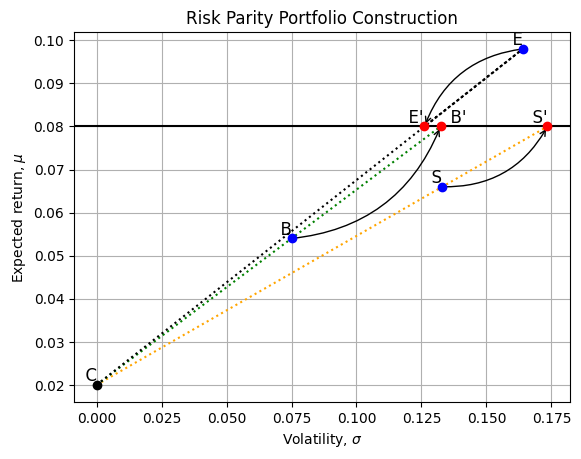

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Define lines and points
points = {
    'C': (sigma_C, mu_C),
    'B': (sigma_B, mu_B),
    'S': (sigma_S, mu_S),
    'E': (sigma_E, mu_E),
    'B\'': (sigma_B_prime, mu_B_prime),
    'S\'': (sigma_S_prime, mu_S_prime),
    'E\'': (sigma_E_prime, mu_E_prime)
}

lines = {
    'orange': ('C', 'S', 'S\''),
    'green': ('C', 'B', 'B\''),
    'black': ('C', 'E', 'E\'')
}

# Plot lines
for color, line_points in lines.items():
    x_values, y_values = zip(*[points[pt] for pt in line_points])
    plt.plot(x_values, y_values, linestyle='dotted', color=color)

# Plot points and labels
for label, (x, y) in points.items():
    if label == 'C':
        plt.scatter(x, y, color='black', zorder=5)
    elif label in ['B\'', 'E\'', 'S\'']:
        plt.scatter(x, y, color='red', zorder=5)
    else:
        plt.scatter(x, y, color='blue', zorder=5)

    if label == 'B\'':
        plt.text(x + 0.01, y, f'  {label}', va='bottom', ha='right', fontsize=12)
    elif label == 'E\'':
        plt.text(x - 0.01, y, f'  {label}', va='bottom', ha='left', fontsize=12)
    else:
        plt.text(x, y, f'  {label}', va='bottom', ha='right', fontsize=12)

# Draw u-shaped arrow from B to B'
arrow_properties_b = dict(facecolor='black', edgecolor='black', arrowstyle='->', shrinkA=0, connectionstyle="arc3,rad=0.3")
plt.annotate('', points['B\''], points['B'], arrowprops=arrow_properties_b)

# Draw inverted u-shaped arrow from E to E'
arrow_properties_e = dict(facecolor='black', edgecolor='black', arrowstyle='->', shrinkA=0, connectionstyle="arc3,rad=0.3")
plt.annotate('', points['E\''], points['E'], arrowprops=arrow_properties_e)

# Draw inverted u-shaped arrow from E to E'
arrow_properties_e = dict(facecolor='black', edgecolor='black', arrowstyle='->', shrinkA=0, connectionstyle="arc3,rad=0.3")
plt.annotate('', points['S\''], points['S'], arrowprops=arrow_properties_e)

# Draw the horizontal line for the 8% target return
plt.axhline(y=0.08, color='black', linestyle='-')

# Set the labels and title
plt.xlabel(r'Volatility, $\sigma$')
plt.ylabel(r'Expected return, $\mu$')
plt.title('Risk Parity Portfolio Construction')

# Show the grid
plt.grid(True)

# Save the figure in the /Figures subfolder
# plt.savefig('Figures/risk_parity_plot.png')


# Show the figure
plt.show()



So, with asset classes $B'$, $S'$ and $E'$, we have three asset classes, all with $E[r] = 0.08$. On the RP Graph, all three new asset classes lie along a straight line going from left to right from $E[r] = 0.08$. Each has different volatilities, but the same $E[r]$.

Now **any** portfolio that combines $B'$, $S'$ and $E'$ will have the desired expected return $(0.08)$.

The following table summarizes the dollar position in each asset class needed to achieve the desired expected return.

In [44]:
import pandas as pd

# Define variables
exp_rtn_values = [mu_B, mu_S, mu_E]
rf_values = [risk_free_rate] * 3
X_values = [X_B, X_S, X_E]
tbill_values = [1-X_B,1-X_S, 1-X_E]
total_values = [X + tbill for X, tbill in zip(X_values, tbill_values)]
target_return = [X * exp_rtn + tbill * rf for X, exp_rtn, tbill,rf in zip(X_values, exp_rtn_values, tbill_values, rf_values)  ]

# Create a DataFrame
data = {
    'Exp Rtn': exp_rtn_values,
    'rf': rf_values,
    '$ Risky': X_values,
    '$ Tbill': tbill_values,
    '$ Total': total_values,
    'Target' : target_return
}

df = pd.DataFrame(data, index=['B', 'S', 'E'])

# Display the DataFrame
df


,Exp Rtn,rf,$ Risky,$ Tbill,$ Total,Target
B,0.054,0.02,1.764706,-0.764706,1.0,0.08
S,0.066,0.02,1.304348,-0.304348,1.0,0.08
E,0.098,0.02,0.769231,0.230769,1.0,0.08


Note: The "\$ Risky" and "\$ Tbill" values are how \$1 should be used in an asset class to generate the desired expected return in that asset class. These are the "risk-adjusted" asset class investments referred to by BridgeWater.

We can now choose **any** mix of B', S' and E' and each portfolio will have E(rp) = 0.08. Each portfolio we choose will have different volatilities, but that is not the primary focus of RP. What RP focuses on is how to spread exposure to broader "risk factors," like economic risk or inflation risk. Let's talk about those two major risks.


So, how do we choose among B', S' and E' to get the risk factor exposure we want (any mix will have an 8\% expected return, as we desire)?

Suppose we are managing a $6 billion portfolio and we want to position our portfolio so that it has:
1. An exposure of 1/3 to Economic risks (captured equally by S and E assets)
2. An exposure of 2/3 to Inflation risks (captured by B assets)

We also want to target an expected return $\mu^*$ (8% in our previous example)

The following table shows the dollar allocation to the risk-adjsted asset classes, B', S' and E'.

In [45]:
wealth = 6
GDP_exposure = 1/3
INFL_exposure = 2/3

Bprime_dollar = INFL_exposure * wealth
Eprime_dollar = GDP_exposure * wealth / 2
Sprime_dollar = GDP_exposure * wealth / 2

# Create a DataFrame
data_pf = {
    '$ invested': [Bprime_dollar, Eprime_dollar, Sprime_dollar],
    '% exposure': [Bprime_dollar/wealth, Eprime_dollar/wealth, Sprime_dollar/wealth]
}

df = pd.DataFrame(data_pf, index=['B\'', 'S\'', 'E\''])

# Add a row for totals
df.loc['Total'] = df.sum()

# Display the DataFrame
df




,$ invested,% exposure
B',4.0,0.666667
S',1.0,0.166667
E',1.0,0.166667
Total,6.0,1.000000


The above table shows that we have 2/3 of our money in bonds (B, low economic risk exposure) and only 1/3 in equities (both public, S, and private, E), with high economic risk exposure.

We saw that a problem with the MVA portfolios is that in order to achieve a target return of 8% we needed to have about $75\%$ (risky-only portfolio) or  58 \% (unconstrained risky + cash) in public and private equities. 

In [46]:
print("Portfolio of cash + risky asset only that delivers 8%:       ", weights_with_rf)
print("Unconstrained portfolio of risky asset only that delivers 8%:", np.append(0,weight_riskyOnly_unconstr))
print("Constrained portfolio of risky asset only that delivers 8%:  ", np.append(0,weight_riskyOnly_constr))


Portfolio of cash + risky asset only that delivers 8%:        [-0.2574027   0.69165046  0.23889971  0.32685254]
Unconstrained portfolio of risky asset only that delivers 8%: [0.         0.25308274 0.2104332  0.53648406]
Constrained portfolio of risky asset only that delivers 8%:   [0.         0.25308274 0.2104332  0.53648406]


This is a LOT of exposure to the "economic risk factor." We reproduce here the three portfolio we derived in the MVA section of this notebook.

If the economy collapses (that might be why we do this!), this portfolio will perform better than either of the MVA portfolios. However, if the economy takes off the RP portfolio will do worse than the MVA portfolio. But, the key is that in the RP portfolio **we got to choose our risk factor exposures**.

Once we have decided our factor exposure, that is, the allocation to the risk-adjusted assets B', S', and E', we can easily figure out how in practice we can achieve the desired factor exposure by finding the weights in the **actual** assets B, S, and E. For example, we know that each dollar we invest in B' is equivalent to investing $X_B$ in B and $1-X_B$ in cash. Therefore, \$4b
invested in B' is equivalent of a portfolio in which
1. $\$4b \times X_B$ is invested in B
2. $\$4b \times (1-X_B)$ is invested in cash

The following code computes the actual positions in the original assets

The following table shows how you would achieve your 4/1/1 asset allocation in the risk-adjusted asset classes by using the REAL (not hypothetical) asset classes. You can see you short C, put a LOT in B and not very much in S or E.

In [47]:
dollar_B_original = Bprime_dollar * X_B
dollar_S_original = Sprime_dollar * X_S
dollar_E_original = Eprime_dollar * X_E

dollar_cash_B = Bprime_dollar * (1-X_B)
dollar_cash_S = Sprime_dollar * (1-X_S)
dollar_cash_E = Eprime_dollar * (1-X_E)

dollar_cash = dollar_cash_B + dollar_cash_S + dollar_cash_E

# print(dollar_B_original)
# print(dollar_S_original)
# print(dollar_E_original)
# print(dollar_cash)


# Create a DataFrame
data_riskParity = {
    '$ risky':  [dollar_B_original, dollar_S_original, dollar_E_original],
    '$ t-bill': [dollar_cash_B, dollar_cash_S, dollar_cash_E],
    '$ risk-adjusted' : [dollar_B_original + dollar_cash_B, dollar_S_original + dollar_cash_S, dollar_E_original + dollar_cash_E],
    '% risky':  [dollar_B_original/wealth, dollar_S_original/wealth, dollar_E_original/wealth],
    '% t-bill': [dollar_cash_B/wealth, dollar_cash_S/wealth, dollar_cash_E/wealth],

}

df_RP = pd.DataFrame(data_riskParity, index=['B', 'S', 'E'])

# Add a column for the sum of the last two columns
df_RP['Total %'] = df_RP['% risky'] + df_RP['% t-bill']


# Add a row for totals
df_RP.loc['Total'] = df_RP.sum()


# The risk-parity (RP) portfolio in the original assets C, B, S, E is 
RP_weights = [df_RP['% t-bill'].loc['Total'], df_RP['% risky'].loc['B'], df_RP['% risky'].loc['S'], df_RP['% risky'].loc['E']]

print("RP_weights:", RP_weights)

# Display the DataFrame
df_RP

# produce a latex table from df_RP
# print(df_RP.to_latex())



RP_weights: [-0.5220670207882483, 1.176470588235294, 0.21739130434782608, 0.1282051282051282]


,$ risky,$ t-bill,$ risk-adjusted,% risky,% t-bill,Total %
B,7.058824,-3.058824,4.0,1.176471,-0.509804,0.666667
S,1.304348,-0.304348,1.0,0.217391,-0.050725,0.166667
E,0.769231,0.230769,1.0,0.128205,0.038462,0.166667
Total,9.132402,-3.132402,6.0,1.522067,-0.522067,1.000000


A final word of **caution** about Risk Parity:

1. By construction, risk parity overweights assets that have **low volatilities**
2. Past volatility tends to be low when today's **prices are high**
3. Hence with risk parity your portfolio loads on **expensive** assets!

# **3. Multi-Risk Factor Model (MRF)**

In the analysis above we have used the following data for the four asset classes C, B, S, and E

In [48]:
# Create a DataFrame
data_mean_return = {
    'Expected Return': [mu_C, mu_B, mu_S, mu_E],
    'Volatility': [sigma_C, sigma_B, sigma_S, sigma_E],

}

df_exp_return = pd.DataFrame(data_mean_return, index=['C', 'B', 'S', 'E'])

# Display the DataFrame
df_exp_return

,Expected Return,Volatility
C,0.020,0.000
B,0.054,0.075
S,0.066,0.133
E,0.098,0.164


Where do these data come from?

The MRF model takes the next step from the RP model by **quantifying** how asset classes (and individual stocks and bonds) are exposed to specified "risk factors."

We will use this MRF model to identify specific asset allocations for institutional investors, like pension plans and endowments. Here, we just introduce some of the concepts involved in MRF.

According to the MRF model the expected return depends on multiple sources of risk, e.g., a $K$ factor model would look like this:

$$ E[r_{s}]=r_{f}+ \sum_{i=1}^K\beta_{is}\lambda_{i}$$

where $\beta_{is}$ denotes the **exposure** of asset $s$ to the risk factor $i$ ("quantity" of risk embedded in asset s) and $\lambda_{i}$ the **price of risk** for factor $i$.

We assume that **three** risk factors will push stock and bond prices around:

1. **MACR**: This is the "economic risk" we spoke of earlier, defined as the percentage change in GDP over some time interval (monthly or quarterly).

2. **INFL**: This is inflation, as defined earlier (percentage change in CPI)

3. **ILLQ**: This is "illiquidity risk," the risk that, when an investor wants to sell an asset class, it can only be sold at a VERY low price, if it can be sold at all. Assume we measure this by the change in bid-ask spreads: when spreads widen, it gets more difficult to trade assets; this happened in 2008, for example!

Hence, according to this model, the expected return of asset $s$ is

$$ E[r_s] = r_f + \beta_{MACR,s}\lambda_{MACR} + \beta_{INFL,s}\lambda_{INFL} + \beta_{ILLIQ,s}\lambda_{ILLIQ}.
$$

The following table shows the input data for a 3-factor MRF model. We show that this input data can be used to generate the expectd returns and volatilities for the C, B, S, and E asset classes used in the two previous models, MVA and RP. So, we've found the mothership!

In [49]:
import pandas as pd

# Given data
betas = {
    'beta_C': [0.0, 0.0, 0.0],
    'beta_B': [0.3, -0.3, 0.5],
    'beta_S': [0.9, 0.4, 0.3],
    'beta_E': [1.1, 0.6, -0.4]
}

lambdas = {
    'MACR': 0.1,
    'INFL': -0.08,
    'ILLIQ': -0.04
}

factor_volatilities = {
    'MACR': 0.14,
    'INFL': 0.05,
    'ILLIQ': 0.12
}

# Create a DataFrame for betas
df_mrf = pd.DataFrame(betas, index=['MACR', 'INFL', 'ILLIQ'])

# Add a row for lambdas
df_mrf['lambda'] = [lambdas['MACR'], lambdas['INFL'], lambdas['ILLIQ']]

# Add a row for factor volatilities
df_mrf['sigma'] = [factor_volatilities['MACR'], factor_volatilities['INFL'], factor_volatilities['ILLIQ']]

# Add a column for risk-free rate (Assuming it's a constant value)
df_mrf['rf'] = 0.02

# Display the DataFrame for betas, lambdas, factor volatilities, and risk-free rate
df_mrf


,beta_C,beta_B,beta_S,beta_E,lambda,sigma,rf
MACR,0.0,0.3,0.9,1.1,0.10,0.14,0.02
INFL,0.0,-0.3,0.4,0.6,-0.08,0.05,0.02
ILLIQ,0.0,0.5,0.3,-0.4,-0.04,0.12,0.02




The above table shows, for each asset class (C, B, S and E) the "risk factor exposures" (we will also call them "risk factor betas") to each risk factor. Here's what the number means: you can see that the private equity (E) is assumed to have a risk factor exposure to economic (MACR) risk of 1.1. This means: if the risk factor shock in a period is, say 0.05 (ie., GDP grew in the period by 5\%), we expect the private equity asset class to have a return higher by $(1.1) \times (0.05) = 0.055$ or +5.5\% than if the MACR shock had been zero. If the economy shrinks by 10\%, we expect this outcome to force private equity values down by $1.1 \times (0.10) = 11\%$, i.e., an 11\% value loss on private equity holdings.

Similarly, you see bonds have a risk factor beta with respect to INFL of -0.30. So, when inflation is 5\% in a given period, we expect bonds to show a value change due to that inflation of $0.05 \times (-0.3) = -0.015$ (a 1.5\% capital loss).

So: $\beta_{MACR, E} = 1.1$ and $\beta_{INFL, B}= -0.30$.

<!-- We number the risk factors: MACR = risk factor1, INFL = risk factor 2 and ILLQ = risk factor 3. -->

So, each asset class, or portfolio of asset classes, has THREE risk measures, or risk exposures. In the CAPM, there was one "beta" because there was just one risk factor: $r_{m}$, the return on the stock market. Now, we have three betas.

Investors feel quite differently about taking on MACR risk versus taking on INFL risk or ILLQ risk. We'll go into this in MUCH more detail later. For now: in the CAPM there was one "lambda" called the "market price of risk," and it is often said to be, in the long term, about 0.06. In the CAPM, if the riskless rate is 2\% and the market price of risk is 6\%, then the equation for the Security Market Line (SML), which defines an asset or asset class' expected return is:

$$
E[r_p]=r_f + \beta_{MKT,p} \times \lambda_{MKT}
$$

If the stock market itself has a beta of 1 (it does), then:

$$
E[r_m] = 0.02 + 1\times (0.06) = 0.08 = 8\%
$$

But, while the CAPM is a one risk factor model, we are using a 3 risk factor model. We must have three betas for each asset class and we must have a lambda for each risk factor (there was one lambda in the CAPM, here there must be 3 ).

We have assumed $\lambda_{MACR} = 0.10$, $\lambda_{INFL} = -0.08$ and $\lambda_{ILLQ} = -0.04$. We will explain why some of the lambdas are positive and some are negative. Just take them as given now.

The **MRF Security Market Line (SML)** becomes, for asset class $j=B,S,E$ is then:
$$
E[r_j] = r_f + \beta_{MACR,j}\lambda_{MACR} + \beta_{INFL,j}\lambda_{INFL} + \beta_{ILLIQ,j}\lambda_{ILLIQ},
$$

Assuming that the factors are uncorrelated, the volatility of asset class $j=B,S,E$ is then
$$
\sigma[r_j]= \sqrt{\beta^2_{MACR,j}\sigma^2_{MACR} + \beta^2_{INFL,j}\sigma^2_{INFL} + \beta^2_{ILLIQ,j}\sigma^2_{ILLIQ}}
$$

And therefore the Sharpe ratio of asset $j=B,S,E$ is
$$
\text{Sharpe ratio} = \frac{E[r_j] - r_f}{\sigma[r_j]}
$$

The following code uses the data from the MRF model to generate the expected return and volatility of each asset class

In [50]:
def calculate_expected_return_volatility(df):
    """
    Calculate the expected return and volatility for each asset.

    Parameters:
    - df: DataFrame containing betas, lambdas, factor volatilities, and risk-free rate.

    Returns:
    - DataFrame with expected return and volatility for each asset.
    """
    # Extract relevant data from the DataFrame
    betas = df[['beta_C', 'beta_B', 'beta_S', 'beta_E']].values  # No need to transpose here
    lambdas = df['lambda'].values
    factor_volatilities = df['sigma'].values
    rf = df['rf'].iloc[0]

    # # Calculate expected return for each asset
    expected_returns = rf + lambdas @ betas
    # expected_returns = rf + np.dot(lambdas, betas)

    # Calculate volatility for each asset
    beta_squared = np.square(betas)
    factor_variances = np.square(factor_volatilities)

    volatility = np.sqrt(factor_variances @ beta_squared)

    sharpe_ratio = (expected_returns - rf)/volatility


    # Create a new DataFrame with results
    results = pd.DataFrame({
        'Asset': ['C', 'B', 'S', 'E'],
        'Expected Return': expected_returns,
        'Volatility' : volatility,
        'Sharpe Ratio': sharpe_ratio
    })

    return results


# Calculate and display the expected return and volatility
mrf_moments = calculate_expected_return_volatility(df_mrf)


mrf_moments


/var/folders/tn/2d55tgm53078fm976n24n72w0000gp/T/ipykernel_82006/86824736.py:27: RuntimeWarning: invalid value encountered in divide
  sharpe_ratio = (expected_returns - rf)/volatility


,Asset,Expected Return,Volatility,Sharpe Ratio
0,C,0.020,0.000000,NaN
1,B,0.054,0.074760,0.454791
2,S,0.066,0.132559,0.347014
3,E,0.098,0.164073,0.475398


As the table shows, these were the input we used when we constructed the mean-variance frontier with "made-up" data

The MRF model allows us to directly measure the risk factor exposure of a given portfolio.

Given a portfolio $x$ the exposure to a given factor $i$ is simply given by exposure of each asset with respect to the factor $i$, where the weights are the portoflio weights.

For example, suppose we have a portfolio $X = (x_C, x_B, x_S, x_E)$. Then the exposure, to, say, the MACR factor is

$$\text{portfolio $X$ exposure to MACR factor:}~~  x_C\beta_{MACR,C} + x_B\beta_{MACR,B}+x_S\beta_{MACR,S}+x_E\beta_{MACR,E}$$

Consider the three different portfolios that have an expected return of 8% and that we constructed above:

1. MVA unconstrained
2. MVA constrained
3. RP portfolio

Here below we collect the weights in three separate arrays for further analysis

In [51]:
MVA_unconstr_weights = weights_with_rf
MVA_constr_weights = np.insert(weight_riskyOnly_constr, 0,0) # Add a zero to the position in cash
# RP_weights = [df_RP['% t-bill'].loc['Total'], df_RP['% risky'].loc['B'], df_RP['% risky'].loc['S'], df_RP['% risky'].loc['E']]

print("MVA_unconstr weights:", MVA_unconstr_weights)
print("MVA_constr weights. :", MVA_constr_weights)
print("RP_weights          :", RP_weights)



MVA_unconstr weights: [-0.2574027   0.69165046  0.23889971  0.32685254]
MVA_constr weights. : [0.         0.25308274 0.2104332  0.53648406]
RP_weights          : [-0.5220670207882483, 1.176470588235294, 0.21739130434782608, 0.1282051282051282]


Let us find the exposure to each of the three factors for each of the three portfolios.

Recall the data on beta exposures and risk prices are contained in the data frame `df_mrf` which we reproduce here below




In [52]:
df_mrf

,beta_C,beta_B,beta_S,beta_E,lambda,sigma,rf
MACR,0.0,0.3,0.9,1.1,0.10,0.14,0.02
INFL,0.0,-0.3,0.4,0.6,-0.08,0.05,0.02
ILLIQ,0.0,0.5,0.3,-0.4,-0.04,0.12,0.02


Let's extract the beta of each assets with respect to the three factors

In [53]:
beta_MACR = df_mrf.loc['MACR', ['beta_C', 'beta_B', 'beta_S', 'beta_E']]
beta_INFL = df_mrf.loc['INFL', ['beta_C', 'beta_B', 'beta_S', 'beta_E']]
beta_ILLIQ = df_mrf.loc['ILLIQ', ['beta_C', 'beta_B', 'beta_S', 'beta_E']]


The exposure of a portfolio $X$ to the MACR factor is

$$\text{portfolio $X$ exposure to MACR factor:}~~  x_C\beta_{MACR,C} + x_B\beta_{MACR,B}+x_S\beta_{MACR,S}+x_E\beta_{MACR,E}$$

The code below performs this calculation for the three portfolios `MVA_unconstr_weights`, `MVA_constr_weights`, and `RP_weights`

In [54]:
beta_MVA_uconstr_MACR = MVA_unconstr_weights @ beta_MACR
beta_MVA_constr_MACR = MVA_constr_weights @ beta_MACR
beta_RP_MACR = RP_weights @ beta_MACR

print("Exposure of MVA_unconstr portfolio to MACR factor:", beta_MVA_uconstr_MACR)
print("Exposure of MVA_constr portfolio to MACR factor  :", beta_MVA_constr_MACR)
print("Exposure of RP portfolio to MACR factor          :", beta_RP_MACR)


Exposure of MVA_unconstr portfolio to MACR factor: 0.7820426654939108
Exposure of MVA_constr portfolio to MACR factor  : 0.8554471684381988
Exposure of RP portfolio to MACR factor          : 0.6896189914092726


Here below we compute the exposure of the three portfolios to all the three factors and collect the results in a dataframe that we display below

In [55]:
# Compute the portfolio exposures to the three factors MACR, INFL, and ILLIQ
beta_MVA_unconstr_MACR = MVA_unconstr_weights @ beta_MACR
beta_MVA_constr_MACR = MVA_constr_weights @ beta_MACR
beta_RP_MACR = RP_weights @ beta_MACR

beta_MVA_unconstr_INFL = MVA_unconstr_weights @ beta_INFL
beta_MVA_constr_INFL = MVA_constr_weights @ beta_INFL
beta_RP_INFL = RP_weights @ beta_INFL

beta_MVA_unconstr_ILLIQ = MVA_unconstr_weights @ beta_ILLIQ
beta_MVA_constr_ILLIQ = MVA_constr_weights @ beta_ILLIQ
beta_RP_ILLIQ = RP_weights @ beta_ILLIQ

# Expeted returns

mu = mrf_moments['Expected Return']
MVA_unconstr_expRet = portfolio_return(MVA_unconstr_weights, mu)
MVA_constr_expRet = portfolio_return(MVA_constr_weights, mu)
RP_vol_expRet = portfolio_return(RP_weights, mu)

#correlation matrix -- Risky and riskless assets
corr = np.array([
    [rho_CC, rho_CB, rho_CS, rho_CE],
    [rho_BC, rho_BB, rho_BS, rho_BE],
    [rho_SC, rho_SB, rho_SS, rho_SE],
    [rho_EC, rho_EB, rho_ES, rho_EE]
])

vol = mrf_moments['Volatility'];
cov_matrix_full = np.outer(vol, vol) * corr #covariance matrix


MVA_unconstr_vol = portfolio_volatility(MVA_unconstr_weights, cov_matrix_full)
MVA_constr_vol = portfolio_volatility(MVA_constr_weights, cov_matrix_full)
RP_vol = portfolio_volatility(RP_weights, cov_matrix_full)


# Collect the results in a dataframe
results = pd.DataFrame({
        ' ': ['x_C', 'x_B', 'x_S', 'x_E', 'beta_MACR', 'beta_INFL', 'beta_ILLIQ', 'Portfolio expected return', 'Portfolio volatility'],
        'MVA_unconstr': np.append(MVA_unconstr_weights, [beta_MVA_unconstr_MACR, beta_MVA_unconstr_INFL, beta_MVA_unconstr_ILLIQ, MVA_unconstr_expRet, MVA_unconstr_vol ]),
        'MVA_constr': np.append(MVA_constr_weights, [beta_MVA_constr_MACR, beta_MVA_constr_INFL, beta_MVA_constr_ILLIQ, MVA_constr_expRet, MVA_constr_vol ]),
        'Risk Parity': np.append(RP_weights, [beta_RP_MACR, beta_RP_INFL, beta_RP_ILLIQ, RP_vol_expRet, RP_vol ])
    })

results

,,MVA_unconstr,MVA_constr,Risk Parity
0,x_C,-0.257403,0.000000,-0.522067
1,x_B,0.691650,0.253083,1.176471
2,x_S,0.238900,0.210433,0.217391
3,x_E,0.326853,0.536484,0.128205
4,beta_MACR,0.782043,0.855447,0.689619
5,beta_INFL,0.084176,0.330139,-0.189062
6,beta_ILLIQ,0.286754,-0.024922,0.602171
7,Portfolio expected return,0.080000,0.080130,0.080000
8,Portfolio volatility,0.087308,0.099277,0.099024


Shorting cash in the MVA allows a reduction in MACR exposure and moves it to ILLIQ. The risk parity portfolio shifts more to ILLIQ and takes less MACR exposure. All of these portfolios achieve an expected return of 8\%; the difference is what risk exposures we take to get that expected return.